# Capstone Project: Police Stations VS Donut Shops

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results](#results)
* [Discussion and Conclusion](#conclusion)

## Introduction: Business problem:<a name="introduction"></a>

In this project, we will try to find a relationship between police stations locations and donut shop nearby. This project targets mostly curious people as I am but also can be used as the first step in marketing research, for example, to find out what is the most popular brand of a donut shop near police stations. To make it more interesting, we will do our research for three cities in the United States: Chicago, New York City, Los Angeles. 

To show the relationship, we will determine the most popular categories of the food joints near police stations, and we will check the presence of donut shops in those categories.

We will also perform clustering of the police stations, and we will check if there are relations between different groups of the police stations.

## Data<a name="data"></a>

To achieve our goal, we will need:
- List of police stations locations for each city
- For each police station, we will need its coordinates
- List of food joints for each station
- For each food joint, we will need its category and distance to the station.

To get the list of police stations, we will use official websites of Police Departments for each city.

To get the list of food joints, we will use Foursquare API.

### Data collecting

We will collect raw data for each city, then we will prepare the data for the Foursquare API.

In [2]:
# Let's import pandas
import pandas as pd

# To see a big picture, let's remove limits for showing rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Chicago**

To get the police stations list for Chicago, we will use a dataset from https://www.chicago.gov/city/en/depts/cpd/dataset/police_stations.html

The list is available in CSV format and has coordinates included. Ready to use data. Beautiful! 

In [3]:
PS_CPD = pd.read_csv("ps_cpd.csv")

In [4]:
# Let's check the data
PS_CPD.head()

,DISTRICT,NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,NaN,NaN,NaN,1177731.401,1881697.404,41.830702,-87.623395,"(41.8307016873, -87.6233953459)"
1,1,Central,1718 S State St,Chicago,IL,60616,http://home.chicagopolice.org/community/distri...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"(41.8583725929, -87.627356171)"
2,6,Gresham,7808 S Halsted St,Chicago,IL,60620,http://home.chicagopolice.org/community/distri...,312-745-3617,312-745-3649,312-745-3639,1172283.013,1853022.646,41.752137,-87.644229,"(41.7521368378, -87.6442289066)"
3,11,Harrison,3151 W Harrison St,Chicago,IL,60612,http://home.chicagopolice.org/community/distri...,312-746-8386,312-746-4281,312-746-5151,1155244.069,1897148.755,41.873582,-87.705488,"(41.8735822883, -87.705488126)"
4,16,Jefferson Park,5151 N Milwaukee Ave,Chicago,IL,60630,http://home.chicagopolice.org/community/distri...,312-742-4480,312-742-4421,312-742-4423,1138480.758,1933660.473,41.974094,-87.766149,"(41.9740944511, -87.7661488432)"


---

**New York City**

To get the police stations list for New York, we will use the web-page https://www1.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page

Ok, it's not that bad. Information in the table format, so we can import it directly to the Pandas.

In [113]:
PS_NYPD_HTML = pd.read_html("http://www1.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page")

What have we got?

In [114]:
PS_NYPD_HTML

[                  Precinct          Phone                         Address
 0                Manhattan      Manhattan                       Manhattan
 1             1st Precinct   212-334-0611               16 Ericsson Place
 2             5th Precinct   212-334-0711             19 Elizabeth Street
 3             6th Precinct   212-741-4811              233 West 10 Street
 4             7th Precinct   212-477-7311              19 1/2 Pitt Street
 5             9th Precinct   212-477-7811               321 East 5 Street
 6            10th Precinct   212-741-8211            230 West 20th Street
 7            13th Precinct   212-477-7411            230 East 21st Street
 8   Midtown South Precinct   212-239-9811            357 West 35th Street
 9            17th Precinct   212-826-3211            167 East 51st Street
 10  Midtown North Precinct   212-767-8400            306 West 54th Street
 11           19th Precinct   212-452-0600            153 East 67th Street
 12           20th Precin

Good. It has information that we need

In [115]:
PS_NYPD = PS_NYPD_HTML[0]

In [116]:
PS_NYPD

,Precinct,Phone,Address
0,Manhattan,Manhattan,Manhattan
1,1st Precinct,212-334-0611,16 Ericsson Place
2,5th Precinct,212-334-0711,19 Elizabeth Street
3,6th Precinct,212-741-4811,233 West 10 Street
4,7th Precinct,212-477-7311,19 1/2 Pitt Street
5,9th Precinct,212-477-7811,321 East 5 Street
6,10th Precinct,212-741-8211,230 West 20th Street
7,13th Precinct,212-477-7411,230 East 21st Street
8,Midtown South Precinct,212-239-9811,357 West 35th Street
9,17th Precinct,212-826-3211,167 East 51st Street


---

**Los Angeles**

To get the police stations list for Los Angeles, we will use the web-page http://www.lapdonline.org/our_communities/content_basic_view/6279

Well, data on this page doesn't offer any convenient structure. We could try to get it scraped by library, but since there is not much data, let's just copy the data from the page and convert it to CSV format.

In [37]:
PS_LAPD = pd.read_csv("ps_lapd.csv")

In [38]:
PS_LAPD.head()

,NAME,ADDRESS,PHONE
0,Central Community Police Station,"251 East Sixth Street, Los Angeles, CA 90014",213-486-6606
1,Devonshire Community Police Station,"10250 Etiwanda Avenue, Northridge, CA 91325",818-832-0633
2,Foothill Community Police Station,"12760 Osborne, Pacoima, CA 91331",818-756-8861
3,Harbor Community Police Station,"2175 John S. Gibson Blvd., San Pedro, CA 90731",310-726-7700
4,Hollenbeck Community Police Station,"2111 E 1st St, Los Angeles, CA 90033",323-342-4100


---

### Data Preparation

We have collected the raw data and now we will prepare it for the Foursquare API

But first, let's import libraries and define variables and functions that we will use.

In [5]:
# convert an address into latitude and longitude values
import geopy.geocoders
from geopy.geocoders import Nominatim

# add a pause between calls
from geopy.extra.rate_limiter import RateLimiter 

# map
import folium 

In [6]:
# Make the libraries alive
geopy.geocoders.options.default_timeout = 7
GEOLOCATOR = Nominatim(user_agent="ps_explorer")
GEOCODE = RateLimiter(GEOLOCATOR.geocode, min_delay_seconds=3)

In [7]:
# Get coordinates for each city
CHICAGO_LOCATION = GEOCODE('Chicago, IL')
NYC_LOCATION = GEOCODE('New York City, NY')
LA_LOCATION = GEOCODE('Los Angeles, CA')

In [11]:
# We'll use a dictionary to save data and settings for each city
CITIES = {
        "chicago": {
            "lat": CHICAGO_LOCATION.latitude,
            "lng": CHICAGO_LOCATION.longitude,
            "zoom": 10,
            "radius": 3000,
            "df_ps": PS_CPD
        },
        "nyc": {
            "lat": NYC_LOCATION.latitude,
            "lng": NYC_LOCATION.longitude,
            "zoom": 10,
            "radius": 2000,
            "df_ps": PS_NYPD
        },
        "la": {
            "lat": LA_LOCATION.latitude,
            "lng": LA_LOCATION.longitude,
            "zoom": 10,
            "radius": 3000,
            "df_ps": PS_LAPD
         }
    }

In [ ]:
def get_map(city):
    
    c_lat = CITIES[city]["lat"]
    c_lng = CITIES[city]["lng"]
    zoom = CITIES[city]["zoom"]
    radius = CITIES[city]["radius"]
    m_df = CITIES[city]["df_ps"]
    
    color = "#2189ff"
    
    out_map = folium.Map(location=[c_lat, c_lng], zoom_start=zoom)
    
    for lat, lng, name in zip(m_df['LATITUDE'], m_df['LONGITUDE'], m_df['NAME']):
    
        label = folium.Popup(name, parse_html=True)
    
        out_map.add_child(
            folium.Circle(
                location=[lat, lng],
                stroke=False,
                radius=radius,
                fill=True,
                fill_color=color,
                fill_opacity=0.2
            )
        )
        
        folium.CircleMarker(
            [lat, lng],
            radius=3,
            popup=label,
            color=color,
            parse_html=False).add_to(out_map)
    
    return out_map

---

**Chicago**

Do we have any missing data?

In [39]:
PS_CPD[PS_CPD.isnull().any(axis=1)]

,DISTRICT,NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,NaN,NaN,NaN,1177731.401,1881697.404,41.830702,-87.623395,"(41.8307016873, -87.6233953459)"


Looks like there is missing data, but it's not important since we will not use it.

Let's look at the map:

In [140]:
get_map("chicago")

Good. This data contains everything we need and ready for the API.

---

**New York City**

In [117]:
PS_NYPD

,Precinct,Phone,Address
0,Manhattan,Manhattan,Manhattan
1,1st Precinct,212-334-0611,16 Ericsson Place
2,5th Precinct,212-334-0711,19 Elizabeth Street
3,6th Precinct,212-741-4811,233 West 10 Street
4,7th Precinct,212-477-7311,19 1/2 Pitt Street
5,9th Precinct,212-477-7811,321 East 5 Street
6,10th Precinct,212-741-8211,230 West 20th Street
7,13th Precinct,212-477-7411,230 East 21st Street
8,Midtown South Precinct,212-239-9811,357 West 35th Street
9,17th Precinct,212-826-3211,167 East 51st Street


Ok, looks good, but we need to get rid of the names of the boroughs.

Since a borough name is the same in all columns, we can filter and drop them.

In [118]:
PS_NYPD_BOROUGH_NAMES = PS_NYPD[PS_NYPD["Precinct"] == PS_NYPD["Address"]]
PS_NYPD_BOROUGH_NAMES

,Precinct,Phone,Address
0,Manhattan,Manhattan,Manhattan
23,Bronx,Bronx,Bronx
36,Brooklyn,Brooklyn,Brooklyn
60,Queens,Queens,Queens
77,Staten Island,Staten Island,Staten Island


In [119]:
PS_NYPD.drop(labels = PS_NYPD_BOROUGH_NAMES.index, inplace=True)
PS_NYPD

,Precinct,Phone,Address
1,1st Precinct,212-334-0611,16 Ericsson Place
2,5th Precinct,212-334-0711,19 Elizabeth Street
3,6th Precinct,212-741-4811,233 West 10 Street
4,7th Precinct,212-477-7311,19 1/2 Pitt Street
5,9th Precinct,212-477-7811,321 East 5 Street
6,10th Precinct,212-741-8211,230 West 20th Street
7,13th Precinct,212-477-7411,230 East 21st Street
8,Midtown South Precinct,212-239-9811,357 West 35th Street
9,17th Precinct,212-826-3211,167 East 51st Street
10,Midtown North Precinct,212-767-8400,306 West 54th Street


Since the dataset for Chicago uses uppercase, we'll change the case of columns names for other datasets so we won't have any problem with functions.

In [120]:
PS_NYPD.columns = PS_NYPD.columns.str.upper()

And we'll rename the "PRECINCT" column

In [121]:
PS_NYPD.rename(columns={"PRECINCT": "NAME"}, inplace=True)

And we need to add city and state to the address

In [122]:
PS_NYPD['ADDRESS'] = PS_NYPD['ADDRESS'].apply(lambda address: "{}, New York, NY".format(address))

Good. But we still need coordinates for each police station.

In [128]:
# Just to make sure we don't abuse the API
if not "LOCATION" in PS_NYPD.columns:
    
    PS_NYPD["LOCATION"] = PS_NYPD['ADDRESS'].apply(GEOCODE)
    
    PS_NYPD["LATITUDE"] = PS_NYPD['LOCATION'].apply(lambda location: location.latitude if location else None)
    PS_NYPD["LONGITUDE"] = PS_NYPD['LOCATION'].apply(lambda location: location.longitude if location else None)

Are there missing values?

In [129]:
PS_NYPD[PS_NYPD.isnull().any(axis=1)]

,NAME,PHONE,ADDRESS,LOCATION,LATITUDE,LONGITUDE
3,6th Precinct,212-741-4811,"233 West 10 Street, New York, NY",None,NaN,NaN
5,9th Precinct,212-477-7811,"321 East 5 Street, New York, NY",None,NaN,NaN
18,28th Precinct,212-678-1611,"2271-89 8th Avenue, New York, NY",None,NaN,NaN
64,103rd Precinct,718-657-8181,"168-02 P.O Edward Byrne Ave., New York, NY",None,NaN,NaN


Looks like the API didn't recognize few addresses. 

I've checked this values on the OpenStreetMap website and found correct values for the API

In [142]:
PS_NYPD.at[3,"ADDRESS"] = "233 W 10th St, New York, NY"
PS_NYPD.at[5,"ADDRESS"] = "321, East 5th Street, East Village, Manhattan, New York, NY"
PS_NYPD.at[18,"ADDRESS"] = "2271 Frederick Douglass Blvd, New York, NY"
PS_NYPD.at[64,"ADDRESS"] = "168-02 91st Ave, New York, NY"

Let's try to get coordinates again

In [131]:
PS_NYPD.loc[pd.isna(PS_NYPD['LOCATION']), 'LOCATION'] = PS_NYPD.loc[pd.isna(PS_NYPD['LOCATION']), 'ADDRESS'].apply(GEOCODE)

In [132]:
PS_NYPD[PS_NYPD.isnull().any(axis=1)]

,NAME,PHONE,ADDRESS,LOCATION,LATITUDE,LONGITUDE
3,6th Precinct,212-741-4811,"233 W 10th St, New York, NY","(233, West 10th Street, Manhattan, Manhattan C...",NaN,NaN
5,9th Precinct,212-477-7811,"321 E 5th St, New York, NY","(321, 5th Street, Greenport, Suffolk County, N...",NaN,NaN
18,28th Precinct,212-678-1611,"2271 Frederick Douglass Blvd, New York, NY","(2271, Frederick Douglass Boulevard, Harlem, M...",NaN,NaN
64,103rd Precinct,718-657-8181,"168-02 91st Ave, New York, NY","(168-02, 91st Avenue, Hillside, Queens, New Yo...",NaN,NaN


Ok, we got the data from the API, let's set LATITUDE and LONGITUDE

In [133]:
PS_NYPD["LATITUDE"] = PS_NYPD['LOCATION'].apply(lambda location: location.latitude if location else None)
PS_NYPD["LONGITUDE"] = PS_NYPD['LOCATION'].apply(lambda location: location.longitude if location else None)

Let's save it to the settings and check the map

In [151]:
CITIES["nyc"]["df_ps"] = PS_NYPD

In [152]:
get_map("nyc")

If you zoom out the map you'll see, that there are 3 police stations that have wrong coordinates

In [154]:
PS_NYPD[PS_NYPD["NAME"].isin(["78th Precinct", "102nd Precinct", "123rd Precinct"])]

,NAME,PHONE,ADDRESS,LOCATION,LATITUDE,LONGITUDE
52,78th Precinct,718-636-6411,"65 6th Avenue, New York, NY","(65, 6th Avenue, Huntington Station, Suffolk C...",40.839440,-73.418185
63,102nd Precinct,718-805-3200,"87-34 118th Street, New York, NY","(87, 118th Street, Lansingburgh, City of Troy,...",42.776984,-73.670587
81,123rd Precinct,718-948-9311,"116 Main Street, New York, NY","(United States Post Office, Main Street, Dansv...",42.559706,-77.694240


Ok, look like OpenStreetMap didn't recognize these addresses either, so let's fix it.

In [155]:
PS_NYPD.at[52,"ADDRESS"] = "65 6th Ave Brooklyn, NY 11217"
PS_NYPD.at[63,"ADDRESS"] = "87-30, 118th Street, Richmond Hill, Queens, New York, 11418"
PS_NYPD.at[81,"ADDRESS"] = "116, Main Street, Tottenville, New York, Staten Island, New York, 10307"

In [157]:
PS_NYPD.at[52,"LOCATION"] = None
PS_NYPD.at[63,"LOCATION"] = None
PS_NYPD.at[81,"LOCATION"] = None

In [158]:
PS_NYPD.loc[pd.isna(PS_NYPD['LOCATION']), 'LOCATION'] = PS_NYPD.loc[pd.isna(PS_NYPD['LOCATION']), 'ADDRESS'].apply(GEOCODE)

In [160]:
PS_NYPD["LATITUDE"] = PS_NYPD['LOCATION'].apply(lambda location: location.latitude if location else None)
PS_NYPD["LONGITUDE"] = PS_NYPD['LOCATION'].apply(lambda location: location.longitude if location else None)

In [161]:
PS_NYPD[PS_NYPD["NAME"].isin(["78th Precinct", "102nd Precinct", "123rd Precinct"])]

,NAME,PHONE,ADDRESS,LOCATION,LATITUDE,LONGITUDE
52,78th Precinct,718-636-6411,"65 6th Ave Brooklyn, NY 11217","(78th Precinct, 6th Avenue, Prospect Heights, ...",40.680907,-73.974176
63,102nd Precinct,718-805-3200,"87-30, 118th Street, Richmond Hill, Queens, Ne...","(87-30, 118th Street, Richmond Hill, Queens, N...",40.698730,-73.831572
81,123rd Precinct,718-948-9311,"116, Main Street, Tottenville, New York, State...","(116, Main Street, Tottenville, New York, Stat...",40.511844,-74.249978


Let's save it to the settings and check the map

In [162]:
CITIES["nyc"]["df_ps"] = PS_NYPD

In [164]:
get_map("nyc")

Now we can save this data frame into a file, so we wouldn't go through this again.

In [165]:
PS_NYPD.to_csv('ps_nypd.csv', index=False)

In [12]:
PS_NYPD = pd.read_csv("ps_nypd.csv")
CITIES["nyc"]["df_ps"] = PS_NYPD

---

**Los Angeles**

In [167]:
PS_LAPD

,NAME,ADDRESS,PHONE
0,Central Community Police Station,"251 East Sixth Street, Los Angeles, CA 90014",213-486-6606
1,Devonshire Community Police Station,"10250 Etiwanda Avenue, Northridge, CA 91325",818-832-0633
2,Foothill Community Police Station,"12760 Osborne, Pacoima, CA 91331",818-756-8861
3,Harbor Community Police Station,"2175 John S. Gibson Blvd., San Pedro, CA 90731",310-726-7700
4,Hollenbeck Community Police Station,"2111 E 1st St, Los Angeles, CA 90033",323-342-4100
5,Hollywood Community Police Station,"1358 Wilcox Ave, Los Angeles, CA 90028",213-972-2971
6,Mission Community Police Station,"11121 Sepulveda Blvd, Mission Hills, CA 91345",818-838-9800
7,Newton Community Police Station,"3400 Central Avenue, Los Angeles, CA 90011",323-846-6547
8,North Hollywood Community Police Station,"11640 Burbank Boulevard, North Hollywood, CA 9...",818-623-4016
9,Northeast Community Police Station,"3353 San Fernando Road, Los Angeles, CA 90065",323-561-3211


Good. But we still need coordinates for each police station.

In [168]:
# Just to make sure we don't abuse the API
if not "LOCATION" in PS_LAPD.columns:
    
    PS_LAPD["LOCATION"] = PS_LAPD['ADDRESS'].apply(GEOCODE)
    
    PS_LAPD["LATITUDE"] = PS_LAPD['LOCATION'].apply(lambda location: location.latitude if location else None)
    PS_LAPD["LONGITUDE"] = PS_LAPD['LOCATION'].apply(lambda location: location.longitude if location else None)

Are there missing values?

In [171]:
PS_LAPD[PS_LAPD.isnull().any(axis=1)]

,NAME,ADDRESS,PHONE,LOCATION,LATITUDE,LONGITUDE


Good. So let's check the map

In [172]:
CITIES["la"]["df_ps"] = PS_LAPD

In [174]:
get_map("la")

Looks good. Lets save this data frame as well

In [175]:
PS_LAPD.to_csv('ps_lapd.csv', index=False)

In [13]:
PS_LAPD = pd.read_csv("ps_lapd.csv")
CITIES["la"]["df_ps"] = PS_LAPD

---

#### Get data from Foursquare API

Now we are ready to collect data for each police station

There is one problem with this API: we can't get a full list of food joints, because the API has a limit of 100 results for each location and give those locations based on its own criteria of popularity. 

So, to get the most complete list of food joints for each police station, we will make two requests for each location:
- All food joints
- Search food joints for a "donut" keyword

Results will be sorted by distance.

---

Let's define everything that we will use

In [14]:
# To handle JSON
import json
# To make API request
import requests

#To get some rest
import time

In [1]:
FS_CLIENT_ID = 'your Foursquare ID'
FS_CLIENT_SECRET = 'your Foursquare Secret'
FS_VERSION = '20200501'
FS_LIMIT = 150

In [16]:
def get_url(method, params):
    
    url =  'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}&limit={}'.format(
        method, FS_CLIENT_ID, FS_CLIENT_SECRET, FS_VERSION, FS_LIMIT)
    
    for param in params:
        url += "&"+param[0]+"="+str(param[1])
    
    return url

In [17]:
def get_spots_list_from_fs(city, method, params, filename):
    
    wait = 2 # how many seconds to wait between iterations
    
    venues_list = []
    
    params.append(("radius", CITIES[city]["radius"])) # radius from settings
    
    m_df = CITIES[city]["df_ps"]
       
    for lat, lng in zip(m_df["LATITUDE"], m_df["LONGITUDE"]):
        
        url_params = params[:] # copy the parameters
        
        url_params.append(("ll", "{},{}".format(lat,lng)))
        
        url = get_url(method, url_params)
    
        venues_list.append(requests.get(url).json())
        
        time.sleep(wait)
    
    # Save JSON to the file
    with open(filename, "w") as outfile: 
        json.dump(venues_list, outfile)
    
    print("The results are saved as: {}".format(filename))

In [18]:
def get_spots_data(city, filename):
    
    #get JSON from the file
    with open(filename, 'r') as openfile: 
        json_data = json.load(openfile)
    
    df_ps = CITIES[city]["df_ps"]
    
    out = pd.DataFrame(columns=["PS Name", "PS Latitude", "PS Longitude", "Name", "Latitude", "Longitude", "Distance", "Category"])
    
    # Just for measurement. 
    venues_size = [] # How many results we got
    total_results = [] # How many results in total
    
    for index, row in enumerate(json_data):
        venues = row['response']['groups'][0]['items']
        
        venues_size.append(len(venues))
        total_results.append(row['response']['totalResults'])
        
        if not venues:
            continue
        
        for venue in venues:
            
            name = venue['venue']['name']
            lat = venue['venue']['location']['lat']
            lng = venue['venue']['location']['lng']
            dist= venue['venue']['location']['distance']
            
            if len(venue['venue']['categories']) == 0:
                cat = None
            else:
                cat = venue['venue']['categories'][0]['name']
                
            out=out.append(
                {
                'PS Name': df_ps.at[index, "NAME"], # Police Station Name
                'PS Latitude': df_ps.at[index, "LATITUDE"], # Police Station lat
                'PS Longitude': df_ps.at[index, "LONGITUDE"], # Police Station lng 
                'Name': name,
                'Latitude': lat,
                'Longitude': lng,
                'Distance': dist,
                'Category': cat
                },
                ignore_index=True)
            
    print("------------ ")
    print(filename)
    print("Total results: ", total_results)
    print("Venues size: ", venues_size)
    print("Original size: ", out.shape[0])
    print("Cleaned size: ", out.drop_duplicates().shape[0])
    
    return out.drop_duplicates().convert_dtypes() # drop venues duplicates

In [19]:
# Since we get two results for the location, this function merges them and remove duplicates 
def get_merged_spots(df1, df2):
    
    out = pd.concat([df1, df2])
    
    print("------------ ")
    print("Original size: ", out.shape[0])
    print("Cleaned size: ", out.drop_duplicates().shape[0])
    
    out.drop_duplicates(inplace=True)
    
    return out.convert_dtypes()

---

**Chicago**

We are ready to get data for Chicago, so let's do it

In [185]:
# For all food joints
get_spots_list_from_fs(
    city="chicago",
    method="explore",
    params=[
        ("categoryId", '4d4b7105d754a06374d81259'), # Food
        ("time","any"),
        ("day","any"),
        ("sortByDistance", 1) 
    ],
    filename="fs_chicago_all.json"
)

The results are saved as :fs_chicago_all.json file


In [187]:
# Only for "donut" keyword
get_spots_list_from_fs(
    city="chicago",
    method="explore",
    params=[
        ("query","donut"),
        ("time","any"),
        ("day","any"),
        ("sortByDistance", 1) 
    ],
    filename="fs_chicago_donut.json"
)

The results are saved as: fs_chicago_donut.json


Let's merge all the data and save it

In [20]:
CITIES["chicago"]["df_spots_from_json"] = get_merged_spots(
    get_spots_data("chicago", "fs_chicago_all.json"), 
    get_spots_data("chicago", "fs_chicago_donut.json"))

------------ 
fs_chicago_all.json
Total results:  [109, 133, 104, 128, 114, 135, 125, 67, 119, 149, 125, 123, 249, 211, 159, 42, 237, 249, 248, 174, 83, 33, 122]
Venues size:  [100, 100, 100, 100, 100, 100, 100, 67, 100, 100, 100, 100, 100, 100, 100, 42, 100, 100, 100, 100, 83, 33, 100]
Original size:  2125
Cleaned size:  2125
------------ 
fs_chicago_donut.json
Total results:  [9, 25, 6, 11, 6, 12, 6, 3, 4, 6, 7, 8, 18, 22, 10, 2, 12, 57, 20, 15, 5, 3, 11]
Venues size:  [9, 25, 6, 11, 6, 12, 6, 3, 4, 6, 7, 8, 18, 22, 10, 2, 12, 57, 20, 15, 5, 3, 11]
Original size:  278
Cleaned size:  278
------------ 
Original size:  2403
Cleaned size:  2343


Good. Let's look what data we got

In [21]:
CITIES["chicago"]["df_spots_from_json"].head(50)

,PS Name,PS Latitude,PS Longitude,Name,Latitude,Longitude,Distance,Category
0,Headquarters,41.830702,-87.623395,Popeyes Louisiana Kitchen,41.831292,-87.618570,405,Fried Chicken Joint
1,Headquarters,41.830702,-87.623395,Harold's Chicken Shack,41.831024,-87.618214,431,Wings Joint
2,Headquarters,41.830702,-87.623395,Hong Kong Delight,41.830866,-87.617873,458,Asian Restaurant
3,Headquarters,41.830702,-87.623395,Yassa African Restaurant,41.830780,-87.616906,538,African Restaurant
4,Headquarters,41.830702,-87.623395,White Castle,41.831609,-87.616395,589,Fast Food Restaurant
5,Headquarters,41.830702,-87.623395,Taco Bell,41.833276,-87.616587,633,Fast Food Restaurant
6,Headquarters,41.830702,-87.623395,Dunkin',41.831586,-87.614971,705,Donut Shop
7,Headquarters,41.830702,-87.623395,Wingstop,41.832425,-87.615098,714,Wings Joint
8,Headquarters,41.830702,-87.623395,SUBWAY,41.831343,-87.614715,723,Sandwich Place
9,Headquarters,41.830702,-87.623395,Pearl's Place,41.823704,-87.622868,780,Southern / Soul Food Restaurant


Any missing data?

In [22]:
CITIES["chicago"]["df_spots_from_json"][CITIES["chicago"]["df_spots_from_json"].isnull().any(axis=1)]

,PS Name,PS Latitude,PS Longitude,Name,Latitude,Longitude,Distance,Category


Perfect!

---

**New York City**

In [200]:
# For all food joints
get_spots_list_from_fs(
    city="nyc",
    method="explore",
    params=[
        ("categoryId", '4d4b7105d754a06374d81259'), # Food
        ("time","any"),
        ("day","any"),
        ("sortByDistance", 1) 
    ],
    filename="fs_nyc_all.json"
)

The results are saved as: fs_nyc_all.json


In [201]:
# Only for "donut" keyword
get_spots_list_from_fs(
    city="nyc",
    method="explore",
    params=[
        ("query","donut"),
        ("time","any"),
        ("day","any"),
        ("sortByDistance", 1) 
    ],
    filename="fs_nyc_donut.json"
)

The results are saved as: fs_nyc_donut.json


Let's merge all the data and save it

In [23]:
CITIES["nyc"]["df_spots_from_json"] = get_merged_spots(
    get_spots_data("nyc", "fs_nyc_all.json"), 
    get_spots_data("nyc", "fs_nyc_donut.json"))

------------ 
fs_nyc_all.json
Total results:  [248, 248, 248, 250, 248, 248, 248, 249, 250, 250, 250, 250, 250, 233, 194, 231, 242, 190, 192, 215, 196, 170, 233, 96, 166, 122, 216, 103, 178, 107, 168, 140, 128, 225, 133, 160, 103, 140, 210, 178, 193, 128, 148, 213, 208, 122, 124, 243, 206, 249, 242, 238, 240, 228, 131, 248, 241, 77, 44, 188, 114, 113, 72, 134, 132, 236, 158, 239, 134, 164, 75, 222, 215, 68, 69, 111, 84]
Venues size:  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 96, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 77, 44, 100, 100, 100, 72, 100, 100, 100, 100, 100, 100, 100, 75, 100, 100, 68, 69, 100, 84]
Original size:  7485
Cleaned size:  7485
------------ 
fs_nyc_donut.json
Total results:  [81, 79, 59, 64, 57, 87, 82, 94, 92, 94, 54, 32, 37, 21, 25, 16, 15, 16, 20, 16, 17, 9, 22, 11,

Good. Let's look what data we got

In [24]:
CITIES["nyc"]["df_spots_from_json"].head(50)

,PS Name,PS Latitude,PS Longitude,Name,Latitude,Longitude,Distance,Category
0,1st Precinct,40.720599,-74.008342,Interlude Cafe,40.721168,-74.008428,63,Café
1,1st Precinct,40.720599,-74.008342,Bubby's,40.719932,-74.008572,76,American Restaurant
2,1st Precinct,40.720599,-74.008342,sweetgreen,40.721335,-74.009701,140,Salad Place
3,1st Precinct,40.720599,-74.008342,Smith & Mills,40.720089,-74.009876,141,American Restaurant
4,1st Precinct,40.720599,-74.008342,Locanda Verde,40.719981,-74.010002,156,Italian Restaurant
5,1st Precinct,40.720599,-74.008342,Tamarind TriBeCa,40.719211,-74.008727,157,Indian Restaurant
6,1st Precinct,40.720599,-74.008342,Wolfgang's Steakhouse,40.721252,-74.010099,165,Steakhouse
7,1st Precinct,40.720599,-74.008342,Wisefish Poké,40.721805,-74.009905,188,Poke Place
8,1st Precinct,40.720599,-74.008342,American Cut,40.719150,-74.009940,210,Steakhouse
9,1st Precinct,40.720599,-74.008342,Gotan,40.719217,-74.006642,210,Café


Any missing data?

In [25]:
CITIES["nyc"]["df_spots_from_json"][CITIES["nyc"]["df_spots_from_json"].isnull().any(axis=1)]

,PS Name,PS Latitude,PS Longitude,Name,Latitude,Longitude,Distance,Category
1491,88th Precinct,40.690084,-73.960485,Donut Coffee,40.701491,-73.943279,1929,<NA>


Looks like there is one missing category and it's clearly a Donut Shop. Let's fix it

In [26]:
CITIES["nyc"]["df_spots_from_json"].at[1491, "Category"] = "Donut Shop"

---

**Los Angeles**

In [203]:
# For all food joints
get_spots_list_from_fs(
    city="la",
    method="explore",
    params=[
        ("categoryId", '4d4b7105d754a06374d81259'), # Food
        ("time","any"),
        ("day","any"),
        ("sortByDistance", 1) 
    ],
    filename="fs_la_all.json"
)

The results are saved as: fs_la_all.json


In [204]:
# Only for "donut" keyword
get_spots_list_from_fs(
    city="la",
    method="explore",
    params=[
        ("query","donut"),
        ("time","any"),
        ("day","any"),
        ("sortByDistance", 1) 
    ],
    filename="fs_la_donut.json"
)

The results are saved as: fs_la_donut.json


Let's merge all the data and save it

In [27]:
CITIES["la"]["df_spots_from_json"] = get_merged_spots(
    get_spots_data("la", "fs_la_all.json"), 
    get_spots_data("la", "fs_la_donut.json"))

------------ 
fs_la_all.json
Total results:  [112, 171, 52, 95, 115, 204, 108, 154, 166, 197, 212, 183, 250, 86, 79, 156, 122, 131, 250, 189, 145, 203, 85, 171, 145]
Venues size:  [100, 100, 52, 95, 100, 100, 100, 100, 100, 100, 100, 100, 100, 86, 79, 100, 100, 100, 100, 100, 100, 100, 85, 100, 100]
Original size:  2397
Cleaned size:  2397
------------ 
fs_la_donut.json
Total results:  [12, 5, 1, 6, 16, 24, 14, 12, 9, 17, 34, 13, 47, 8, 8, 11, 10, 18, 10, 15, 13, 29, 5, 16, 13]
Venues size:  [12, 5, 1, 6, 16, 23, 14, 12, 9, 17, 33, 12, 46, 7, 8, 11, 9, 16, 9, 14, 13, 28, 5, 15, 13]
Original size:  354
Cleaned size:  354
------------ 
Original size:  2751
Cleaned size:  2671


Any missing data?

In [28]:
CITIES["la"]["df_spots_from_json"][CITIES["la"]["df_spots_from_json"].isnull().any(axis=1)]

,PS Name,PS Latitude,PS Longitude,Name,Latitude,Longitude,Distance,Category
25,Hollenbeck Community Police Station,34.044876,-118.213486,Usa donut,34.043361,-118.200816,1180,<NA>


Looks like there is one missing category and it's clearly a Donut Shop. Let's fix it

In [29]:
CITIES["la"]["df_spots_from_json"].at[25, "Category"] = "Donut Shop"

---

Good. Now when we collected and cleaned the data, we can move to analysis.

---

## Methodology<a name="methodology"></a>

The goal of this project is to determine if there is a relationship between police station locations and donut shop locations, i. e. is the donut shop category one of the most popular categories near police stations.

In the first step, we collected and cleaned the required data for locations of police stations and popular food joints around each station.

In the second step, we will calculate a score for each category of food joints for each police station. The score equals the number of food joints from the same category divided by the median of the distance for the category from the police station.

Using the sum of this score for each category, we will sort the data to find out the most popular categories near police stations for the city. This will answer the main question of this project, but we will go a little further, and in the third step, we will do clustering for each city, and we will try to find relationships between different police stations using K-Means clustering.

---

## Analysis<a name="analysis"></a>

Let's define everything we will use for this step

In [39]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Define a score for each category
def get_scored_spots(city):
    df = CITIES[city]["df_spots_from_json"].copy()
    
    
    def get_cat_quantity(ps, cat):
        
        return df[
            (df["PS Name"] == ps) & 
            (df["Category"] == cat)
        ]["Category"].count()
    
    
    def get_cat_score(ps, cat, quant):
        
        data_cat =  df[(df["PS Name"] == ps) & (df["Category"] == cat)]
        data_dist = data_cat["Distance"].median()
        
        return (quant/data_dist)
    
    
    df["Quantity"] = df.apply(lambda r: get_cat_quantity(r["PS Name"], r["Category"]), axis=1)
    
    df["Score By PS"] = df.apply(lambda r: get_cat_score(r["PS Name"], r["Category"], r["Quantity"]), axis=1)
    
    CITIES[city]["df_spots"] = df.copy() #Save to settings

In [32]:
def get_bar_plot(city):
    
    number_of_cats = 5
    
    data = CITIES[city]["df_spots"].copy()

    data = data[["Category", "Score By PS"]].groupby("Category").sum().reset_index()
    
    data.sort_values(by="Score By PS", ascending=False, inplace=True)
    
    data = data.head(number_of_cats)


    color_donut = "#d9534f"
    color = "#5bc0de"
    width = 0.6
    
    data["color"] = data["Category"].apply(lambda cat: color_donut if cat == "Donut Shop" else color)
    
    fig, ax = plt.subplots(figsize = (17, 7))
    
    labels = list(data["Category"])
    values = list(data["Score By PS"])
    
    x = np.arange(len(labels))
    bars = ax.bar(x, values, width, color=data["color"].to_list())
    
    ax.set_title("The most popular spots in {} near police stations".format(city.upper()), fontsize="22", pad=35)
    
    ax.set_ylabel('Score of the spot', fontsize="18")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    
    ax.tick_params(labelsize='16')
    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    ax.get_yaxis().set_ticks([])
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(round(height, 2),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', 
                    va='bottom', 
                    size='14'
       )
        
    fig.tight_layout()
    plt.show()

---

**Chicago**

Let's get scores

In [33]:
get_scored_spots("chicago")

What we got?

In [34]:
CITIES["chicago"]["df_spots"].head()

,PS Name,PS Latitude,PS Longitude,Name,Latitude,Longitude,Distance,Category,Quantity,Score By PS
0,Headquarters,41.830702,-87.623395,Popeyes Louisiana Kitchen,41.831292,-87.618570,405,Fried Chicken Joint,4,0.001739
1,Headquarters,41.830702,-87.623395,Harold's Chicken Shack,41.831024,-87.618214,431,Wings Joint,3,0.004202
2,Headquarters,41.830702,-87.623395,Hong Kong Delight,41.830866,-87.617873,458,Asian Restaurant,5,0.001886
3,Headquarters,41.830702,-87.623395,Yassa African Restaurant,41.830780,-87.616906,538,African Restaurant,1,0.001859
4,Headquarters,41.830702,-87.623395,White Castle,41.831609,-87.616395,589,Fast Food Restaurant,6,0.002810


First, let's get the most popular categories by quantity to compare it with the result by the score

In [35]:
CITIES["chicago"]["df_spots"]["Category"].value_counts()[:5]

Mexican Restaurant      221
Donut Shop              209
Pizza Place             161
Sandwich Place          160
Fast Food Restaurant    152
Name: Category, dtype: Int64

Ok, now let's see our chart

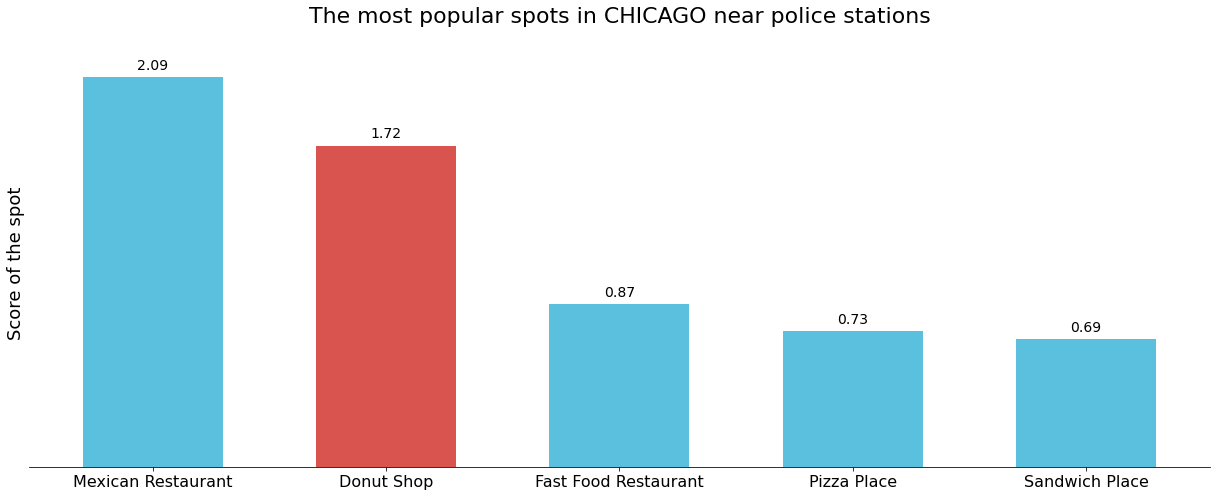

In [40]:
get_bar_plot("chicago")

Interesting. Donut Shop on the second place. They do like Mexican food, don't they?

And the result is slightly different from the sorting by quantity.

---

**New York City**

Let's get scores

In [41]:
get_scored_spots("nyc")

What we got?

In [42]:
CITIES["nyc"]["df_spots"].head()

,PS Name,PS Latitude,PS Longitude,Name,Latitude,Longitude,Distance,Category,Quantity,Score By PS
0,1st Precinct,40.720599,-74.008342,Interlude Cafe,40.721168,-74.008428,63,Café,8,0.008710
1,1st Precinct,40.720599,-74.008342,Bubby's,40.719932,-74.008572,76,American Restaurant,9,0.014851
2,1st Precinct,40.720599,-74.008342,sweetgreen,40.721335,-74.009701,140,Salad Place,2,0.003082
3,1st Precinct,40.720599,-74.008342,Smith & Mills,40.720089,-74.009876,141,American Restaurant,9,0.014851
4,1st Precinct,40.720599,-74.008342,Locanda Verde,40.719981,-74.010002,156,Italian Restaurant,9,0.008824


Again, let's get the most popular categories by quantity to compare it with the result by the score

In [43]:
CITIES["nyc"]["df_spots"]["Category"].value_counts()[:5]

Donut Shop            1031
Pizza Place            782
Bakery                 495
Deli / Bodega          409
Italian Restaurant     398
Name: Category, dtype: Int64

Ok, now let's see our chart

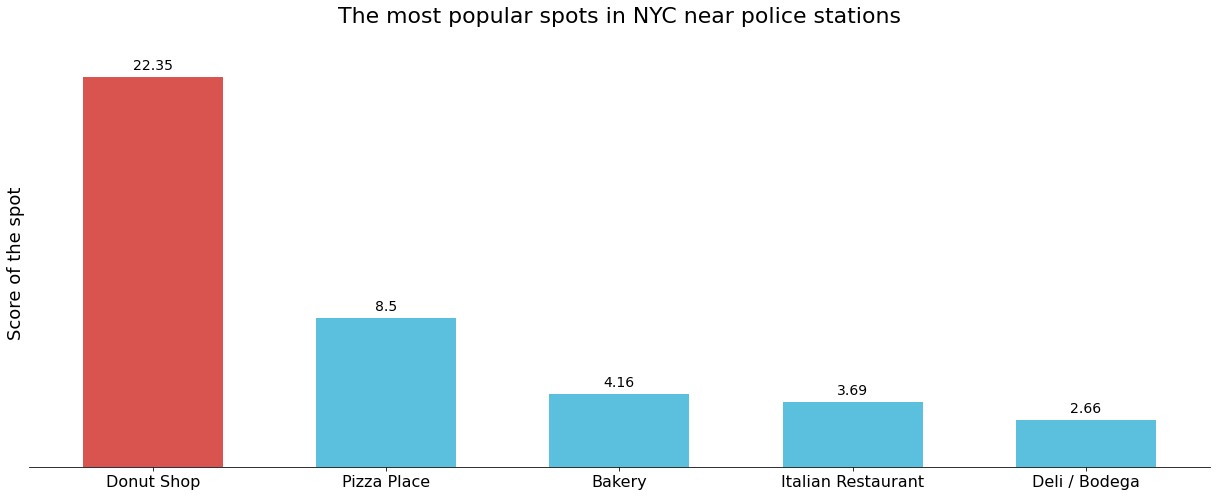

In [44]:
get_bar_plot("nyc")

Wow! Donut Shop has a much higher score than the other categories.

And the result is slightly different from the sorting by quantity.

---

**Los Angeles**

Let's get scores

In [45]:
get_scored_spots("la")

What we got?

In [46]:
CITIES["la"]["df_spots"].head()

,PS Name,PS Latitude,PS Longitude,Name,Latitude,Longitude,Distance,Category,Quantity,Score By PS
0,Central Community Police Station,34.186824,-118.305427,Commonwealth Restaurant,34.182217,-118.304708,517,Restaurant,4,0.002834
1,Central Community Police Station,34.186824,-118.305427,Moore's Delicatessen,34.182808,-118.308868,547,Deli / Bodega,4,0.002567
2,Central Community Police Station,34.186824,-118.305427,Pampas,34.183317,-118.309807,561,Brazilian Restaurant,1,0.001783
3,Central Community Police Station,34.186824,-118.305427,Octopus Japanese Restaurant,34.182790,-118.310380,640,Japanese Restaurant,3,0.004178
4,Central Community Police Station,34.186824,-118.305427,Guisados,34.182734,-118.310987,685,Taco Place,2,0.001877


Again, let's get the most popular categories by quantity to compare it with the result by the score

In [47]:
CITIES["la"]["df_spots"]["Category"].value_counts()[:5]

Donut Shop              284
Mexican Restaurant      222
Fast Food Restaurant    178
Sandwich Place          155
Pizza Place             152
Name: Category, dtype: Int64

Ok, now let's see our chart

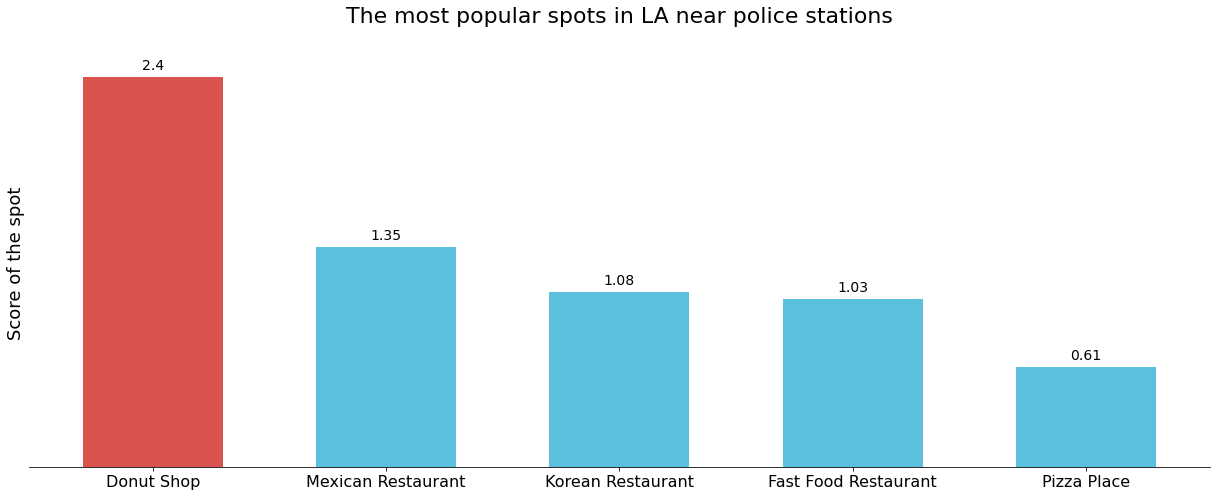

In [48]:
get_bar_plot("la")

Donut Shop has a much higher score than the other categories as well. It is interesting, that Korean restaurants have a higher score than fast-food joints.

Here, the result is much more different from the sorting by quantity. For example, we don't see Korean restaurants, if we sort by the quantity and we don't see the "Sandwich Place" category in the final result.

---

Now we can say, that donuts shop are very popular near police stations. 

Besides donuts, it is very interesting to see, what kind of food each city prefers.

---

#### Clustering

Now, let's try to separate police stations to different groups to see if there any relationships between them.

We will use K-Means for clustering.

In order to do that, let's determine steps we will follow:
- Find best K for clustering
- Cluster all stations by the top categories for each PS
- Find position for Donut Shops in top categories for each cluster
- Show the result on the map

---

Let's define everything we will use for this step

In [77]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [58]:
# Prepare data for clustering, based on the score
def get_data_for_clustering(city):
    
    # If we already did it, just return it
    if "df_spots_for_clustering" in CITIES[city].keys():
        return CITIES[city]["df_spots_for_clustering"]
    
    df = CITIES[city]["df_spots"]
    
    # Cobine the score
    df_sorted = df.groupby(["PS Name", "PS Latitude", "PS Longitude", "Category"]).agg({
        "Score By PS": "mean",
    }).reset_index()
    
    # One hot encoding
    df_oh = pd.get_dummies(df_sorted['Category'], prefix="cat", prefix_sep="-").mul(df_sorted["Score By PS"], axis=0)
    
    # Insert PS data back
    df_oh.insert(0, 'PS Name', df_sorted['PS Name'])
    df_oh.insert(1, 'PS Latitude', df_sorted['PS Latitude'])
    df_oh.insert(2, 'PS Longitude', df_sorted['PS Longitude'])
    
    # Group data by PS
    df_grouped = df_oh.groupby(["PS Name", 'PS Latitude', 'PS Longitude']).sum().reset_index()
    
    CITIES[city]["df_spots_for_clustering"] = df_grouped
    
    return CITIES[city]["df_spots_for_clustering"]

In [59]:
def get_k_means(city, k):
    
    df = get_data_for_clustering(city).filter(regex='^cat-',axis=1)
    
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    
    return km

In [66]:
def show_best_k(city):

    sum_of_squared_distances = []
    
    K = range(1,15)
    
    for k in K:
        km = get_k_means(city, k)
        sum_of_squared_distances.append(km.inertia_)
        
    plt.plot(K, sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k. {}'.format(city.upper()))
    plt.show()

In [61]:
def get_clusters(city, k):
    
    km = get_k_means(city, k)

    df = CITIES[city]["df_spots_for_clustering"].iloc[:, 0:3]
    
    df.insert(0, 'PS Cluster', km.labels_)  
        
    CITIES[city]["df_ps_clustered"] = df

In [73]:
# Return Top most popular categories for particular Police Station
def get_top_spots_by_ps(city, ps_name):

    df = CITIES[city]["df_spots"]
    
    df_ps = df[df["PS Name"] == ps_name]

    df_grouped = df_ps.groupby(["PS Name", "Category", "Score By PS"]).mean().reset_index()
    
    df_grouped.sort_values(by="Score By PS", ascending=False, ignore_index=True, inplace=True)
    
    return df_grouped["Category"].to_list()

In [79]:
# Return the position of the Donut Shop category in the top list for Police Station
# Important thing is, if there is no Donut Shop category in the list we will return the length
# of the list
def get_donut_shop_position(list_):
    
    cat_donut = "Donut Shop"
    
    if cat_donut in list_:
        return list_.index(cat_donut) + 1
    else:
        return len(list_)

In [64]:
# Add a column with the position of Donut Shop Category within the cluster
def get_donut_shop_score_for_cluster(city):
    
    top_cats = 10
    
    df = CITIES[city]["df_ps_clustered"]
         
    df['Donut Shop Position'] = df["PS Name"].apply(
        lambda ps: get_donut_shop_position(get_top_spots_by_ps(city, ps))
    )
       
    df['Donut Shop Position (mean by cluster)'] = df["PS Cluster"].apply(
        lambda cl: df[df["PS Cluster"] == cl]["Donut Shop Position"].mean()
    )
    
    # Add top categories For each Police Station
    for i in range(0, top_cats):
        df["Top Cat #{}".format(i+1)] = df["PS Name"].apply(lambda ps: get_top_spots_by_ps(city, ps)[i])
    
    CITIES[city]["df_ps_clustered"] = df

In [107]:
def get_map_clusters(city):
    
    c_lat = CITIES[city]["lat"]
    c_lng = CITIES[city]["lng"]
    zoom = CITIES[city]["zoom"]
    radius = CITIES[city]["radius"]
    m_df = CITIES[city]["df_ps_clustered"]
    
    kclusters = m_df["PS Cluster"].unique().size
    
    # set color scheme for the clusters
    x = np.arange(kclusters)
    ys = [i + x + (i*x)**2 for i in range(kclusters)]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]
    
    out_map = folium.Map(location=[c_lat, c_lng], zoom_start=zoom)
    
    for cluster, donut_score, donut_score_by_cluster, lat, lng, name in zip(
        m_df["PS Cluster"], 
        m_df['Donut Shop Position'], 
        m_df['Donut Shop Position (mean by cluster)'], 
        m_df['PS Latitude'], 
        m_df['PS Longitude'], 
        m_df['PS Name']
    ):
        
        label = folium.Popup(name, parse_html=True)
        
        color = color=rainbow[cluster-1]
        
        folium.Marker(
            location=[lat, lng],
            icon=folium.DivIcon(
                icon_anchor=(20,10),
                html = "<div style='font-family: courier new; font-weight:bold; font-size: 10pt; color: white'>{}<span style='font-size: 8pt;'>({})</span></div>".format(donut_score, round(donut_score_by_cluster, 2))
            )
        ).add_to(out_map)
        
        out_map.add_child(
            folium.Circle(
                location=[lat, lng],
                stroke=False,
                radius=radius,
                fill=True,
                fill_color=color,
                fill_opacity=0.8
            )
        )
        
    return out_map

---

**Chicago**

Let's find the best K for clustering

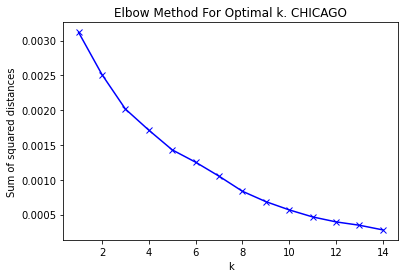

In [69]:
show_best_k("chicago")

It looks like the best value for K is 3

In [70]:
get_clusters("chicago", 3)

Let's check what cluster we got

In [71]:
CITIES["chicago"]["df_ps_clustered"]

,PS Cluster,PS Name,PS Latitude,PS Longitude
0,1,Albany Park,41.966053,-87.728115
1,0,Austin,41.880083,-87.768200
2,0,Calumet,41.692723,-87.604506
3,1,Central,41.858373,-87.627356
4,2,Chicago Lawn,41.778987,-87.708864
5,1,Deering,41.837394,-87.646408
6,0,Englewood,41.779632,-87.660887
7,2,Grand Central,41.918609,-87.765574
8,0,Grand Crossing,41.766431,-87.605748
9,0,Gresham,41.752137,-87.644229


Now let's find position in the list of top categories for Donut Shops

In [74]:
get_donut_shop_score_for_cluster("chicago")

In [75]:
CITIES["chicago"]["df_ps_clustered"]

,PS Cluster,PS Name,PS Latitude,PS Longitude,Donut Shop Position,Donut Shop Position (mean by cluster),Top Cat #1,Top Cat #2,Top Cat #3,Top Cat #4,Top Cat #5,Top Cat #6,Top Cat #7,Top Cat #8,Top Cat #9,Top Cat #10
0,1,Albany Park,41.966053,-87.728115,1,2.333333,Donut Shop,Pizza Place,Middle Eastern Restaurant,Sandwich Place,Bakery,Korean Restaurant,Asian Restaurant,Peruvian Restaurant,Restaurant,Coffee Shop
1,0,Austin,41.880083,-87.768200,4,7.200000,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Donut Shop,Sandwich Place,Bakery,Seafood Restaurant,Mexican Restaurant,Chinese Restaurant,Breakfast Spot
2,0,Calumet,41.692723,-87.604506,6,7.200000,Food Court,Sandwich Place,Café,Fast Food Restaurant,Fried Chicken Joint,Donut Shop,Food,American Restaurant,Diner,Restaurant
3,1,Central,41.858373,-87.627356,2,2.333333,Chinese Restaurant,Donut Shop,Café,Pizza Place,Thai Restaurant,Mexican Restaurant,Korean Restaurant,Sandwich Place,Tapas Restaurant,American Restaurant
4,2,Chicago Lawn,41.778987,-87.708864,7,4.750000,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Sandwich Place,Taco Place,Middle Eastern Restaurant,Donut Shop,Bakery,American Restaurant,Chinese Restaurant
5,1,Deering,41.837394,-87.646408,4,2.333333,Mexican Restaurant,Chinese Restaurant,Coffee Shop,Donut Shop,Pizza Place,Bakery,Café,Hot Dog Joint,Mediterranean Restaurant,Sandwich Place
6,0,Englewood,41.779632,-87.660887,5,7.200000,Fast Food Restaurant,Fried Chicken Joint,Sandwich Place,Seafood Restaurant,Donut Shop,Restaurant,Food,American Restaurant,Café,Wings Joint
7,2,Grand Central,41.918609,-87.765574,3,4.750000,Mexican Restaurant,Sandwich Place,Donut Shop,Fast Food Restaurant,Pizza Place,American Restaurant,Cuban Restaurant,Fried Chicken Joint,Seafood Restaurant,Restaurant
8,0,Grand Crossing,41.766431,-87.605748,6,7.200000,Fried Chicken Joint,Fast Food Restaurant,Sandwich Place,American Restaurant,Café,Donut Shop,Seafood Restaurant,BBQ Joint,Chinese Restaurant,Food Truck
9,0,Gresham,41.752137,-87.644229,9,7.200000,Fast Food Restaurant,Seafood Restaurant,Sandwich Place,Caribbean Restaurant,Fried Chicken Joint,Middle Eastern Restaurant,American Restaurant,Pizza Place,Donut Shop,Chinese Restaurant


And now we're ready to see the map.

The numbers represent the position of Donut shop in top categories for each police station and the average position of the Donut Shop category for each cluster respectively

In [110]:
get_map_clusters("chicago")

Interesting. Donuts shops are much more popular in the north part of the city than in the south part. The third cluster is a link between two big clusters.

---

**New York**

Let's find the best K for clustering

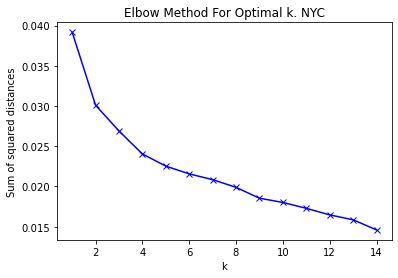

In [80]:
show_best_k("nyc")

It looks like the best value for K is 4

In [81]:
get_clusters("nyc", 4)

Let's check what cluster we got

In [82]:
CITIES["nyc"]["df_ps_clustered"]

,PS Cluster,PS Name,PS Latitude,PS Longitude
0,0,100th Precinct,40.586362,-73.816560
1,0,101st Precinct,40.602950,-73.749997
2,0,102nd Precinct,40.698730,-73.831572
3,0,103rd Precinct,40.707148,-73.792690
4,0,104th Precinct,40.650033,-73.685756
5,0,105th Precinct,40.726170,-73.735129
6,0,106th Precinct,40.682199,-73.839749
7,0,107th Precinct,40.729949,-73.810627
8,3,108th Precinct,40.743040,-73.954744
9,0,109th Precinct,40.762352,-73.827020


Now let's find position in the list of top categories for Donut Shops

In [83]:
get_donut_shop_score_for_cluster("nyc")

In [84]:
CITIES["nyc"]["df_ps_clustered"]

,PS Cluster,PS Name,PS Latitude,PS Longitude,Donut Shop Position,Donut Shop Position (mean by cluster),Top Cat #1,Top Cat #2,Top Cat #3,Top Cat #4,Top Cat #5,Top Cat #6,Top Cat #7,Top Cat #8,Top Cat #9,Top Cat #10
0,0,100th Precinct,40.586362,-73.816560,19,5.351351,Coffee Shop,Ramen Restaurant,Fast Food Restaurant,Chinese Restaurant,Bakery,Deli / Bodega,Eastern European Restaurant,Seafood Restaurant,Breakfast Spot,Brazilian Restaurant
1,0,101st Precinct,40.602950,-73.749997,10,5.351351,Deli / Bodega,Southern / Soul Food Restaurant,Pizza Place,Fried Chicken Joint,Chinese Restaurant,Breakfast Spot,Sandwich Place,Caribbean Restaurant,Diner,Donut Shop
2,0,102nd Precinct,40.698730,-73.831572,7,5.351351,Latin American Restaurant,Indian Restaurant,Chinese Restaurant,Pizza Place,Deli / Bodega,Sandwich Place,Donut Shop,Fast Food Restaurant,Diner,Caribbean Restaurant
3,0,103rd Precinct,40.707148,-73.792690,2,5.351351,Fried Chicken Joint,Donut Shop,Pizza Place,Chinese Restaurant,Fast Food Restaurant,Caribbean Restaurant,Indian Restaurant,Sandwich Place,Deli / Bodega,Mexican Restaurant
4,0,104th Precinct,40.650033,-73.685756,9,5.351351,Deli / Bodega,Chinese Restaurant,Bagel Shop,Pizza Place,Italian Restaurant,Sushi Restaurant,Japanese Restaurant,Bakery,Donut Shop,Fast Food Restaurant
5,0,105th Precinct,40.726170,-73.735129,5,5.351351,Pizza Place,Chinese Restaurant,Deli / Bodega,Fast Food Restaurant,Donut Shop,Italian Restaurant,Sandwich Place,Fried Chicken Joint,Bakery,Indian Restaurant
6,0,106th Precinct,40.682199,-73.839749,3,5.351351,Pizza Place,Deli / Bodega,Donut Shop,Breakfast Spot,Chinese Restaurant,Fast Food Restaurant,Diner,Spanish Restaurant,Sandwich Place,Indian Restaurant
7,0,107th Precinct,40.729949,-73.810627,4,5.351351,Pizza Place,Sushi Restaurant,Sandwich Place,Donut Shop,Middle Eastern Restaurant,Chinese Restaurant,Deli / Bodega,Vegetarian / Vegan Restaurant,Restaurant,Food Truck
8,3,108th Precinct,40.743040,-73.954744,5,3.100000,Italian Restaurant,Japanese Restaurant,Burger Joint,Greek Restaurant,Donut Shop,Café,American Restaurant,Mexican Restaurant,Bakery,Noodle House
9,0,109th Precinct,40.762352,-73.827020,5,5.351351,Chinese Restaurant,Korean Restaurant,Hotpot Restaurant,Dumpling Restaurant,Donut Shop,Cantonese Restaurant,Szechuan Restaurant,Bakery,Creperie,Food Court


And now we're ready to see the map.

The numbers represent the position of Donut shop in top categories for each police station and the average position of the Donut Shop category for each cluster respectively

In [111]:
get_map_clusters("nyc")

Interesting. Looks like we have an outlier cluster. 

The popularity of donut shops decreases with increasing distance from downtown.

---

**Los Angeles**

Let's find the best K for clustering

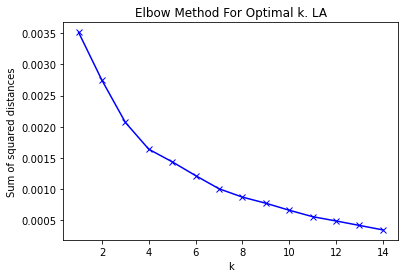

In [87]:
show_best_k("la")

It looks like the best value for K is 4

In [88]:
get_clusters("la", 4)

Let's check what cluster we got

In [89]:
CITIES["la"]["df_ps_clustered"]

,PS Cluster,PS Name,PS Latitude,PS Longitude
0,1,77th Community Police Station,33.970993,-118.278196
1,1,Central Community Police Station,34.186824,-118.305427
2,3,Central Traffic Division,34.043759,-118.247771
3,1,Devonshire Community Police Station,34.256388,-118.531926
4,1,Foothill Community Police Station,34.253116,-118.410790
5,1,Harbor Community Police Station,33.758410,-118.288034
6,1,Hollenbeck Community Police Station,34.044876,-118.213486
7,3,Hollywood Community Police Station,34.095854,-118.330895
8,1,Mission Community Police Station,34.256858,-118.467278
9,1,Newton Community Police Station,34.013188,-118.256410


Now let's find position in the list of top categories for Donut Shops

In [90]:
get_donut_shop_score_for_cluster("la")

In [91]:
CITIES["la"]["df_ps_clustered"]

,PS Cluster,PS Name,PS Latitude,PS Longitude,Donut Shop Position,Donut Shop Position (mean by cluster),Top Cat #1,Top Cat #2,Top Cat #3,Top Cat #4,Top Cat #5,Top Cat #6,Top Cat #7,Top Cat #8,Top Cat #9,Top Cat #10
0,1,77th Community Police Station,33.970993,-118.278196,6,4.647059,Burger Joint,Fast Food Restaurant,Fried Chicken Joint,Sandwich Place,Pizza Place,Donut Shop,Mexican Restaurant,American Restaurant,Bakery,Restaurant
1,1,Central Community Police Station,34.186824,-118.305427,1,4.647059,Donut Shop,American Restaurant,Japanese Restaurant,Pizza Place,Fast Food Restaurant,Burger Joint,Mexican Restaurant,Sandwich Place,Restaurant,Middle Eastern Restaurant
2,3,Central Traffic Division,34.043759,-118.247771,1,1.000000,Donut Shop,Sushi Restaurant,Mexican Restaurant,Bakery,Italian Restaurant,Burger Joint,Ramen Restaurant,Gastropub,American Restaurant,Japanese Restaurant
3,1,Devonshire Community Police Station,34.256388,-118.531926,10,4.647059,Fast Food Restaurant,Fish & Chips Shop,Sandwich Place,Pizza Place,Korean Restaurant,Chinese Restaurant,Sushi Restaurant,Food Truck,Mexican Restaurant,Donut Shop
4,1,Foothill Community Police Station,34.253116,-118.410790,15,4.647059,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Burger Joint,Fried Chicken Joint,Sandwich Place,Thai Restaurant,American Restaurant,Chinese Restaurant,Food Truck
5,1,Harbor Community Police Station,33.758410,-118.288034,6,4.647059,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Sandwich Place,Italian Restaurant,Donut Shop,American Restaurant,Seafood Restaurant,Sushi Restaurant,Burger Joint
6,1,Hollenbeck Community Police Station,34.044876,-118.213486,2,4.647059,Mexican Restaurant,Donut Shop,Pizza Place,Seafood Restaurant,Fast Food Restaurant,Bakery,Café,Food Truck,Burger Joint,Sandwich Place
7,3,Hollywood Community Police Station,34.095854,-118.330895,1,1.000000,Donut Shop,Thai Restaurant,Pizza Place,Café,Italian Restaurant,Sushi Restaurant,Mexican Restaurant,American Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant
8,1,Mission Community Police Station,34.256858,-118.467278,5,4.647059,Steakhouse,Mexican Restaurant,Fast Food Restaurant,Sandwich Place,Donut Shop,Pizza Place,Latin American Restaurant,Italian Restaurant,Burger Joint,Thai Restaurant
9,1,Newton Community Police Station,34.013188,-118.256410,2,4.647059,Fast Food Restaurant,Donut Shop,Mexican Restaurant,Taco Place,Sandwich Place,Fried Chicken Joint,Pizza Place,Café,American Restaurant,Chinese Restaurant


And now we're ready to see the map.

The numbers represent the position of Donut shop in top categories for each police station and the average position of the Donut Shop category for each cluster respectively

In [113]:
get_map_clusters("la")

Interesting. Looks like we have an outlier cluster again. 

The popularity of donut shops mostly spread all over the city pretty differently.

---

## Results<a name="results"></a>

The analysis shows that donuts shops are popular near police stations.

The clustering, however, shows that more extensive analysis should be made, especially in New York City and Los Angeles since clusters, in general, are not very different and have outliers. 

---

## Discussion and Conclusion<a name="conclusion"></a>

The purpose of this project was to find out if there is a relationship between police station locations and the popularity of donut shops near stations. 

The relationship was defined, but analysis showed that there are steps in this project that could be improved:
- List of the food joints
- - It makes sense to increase the radius around each police station for more objective evaluation.
- - Get the full list of food joints within the radius regardless of popularity defined by the API.
- Make a more extensive analysis of the outliers in clustering.
 
This concludes the results of our project, but there are further steps that can be performed, for example:
- To find the most popular brands of donut shops near police stations.
- To find the most popular brands of donut shops within the cities and compare the result with donut shops near the stations.